## Disclaimer
This data analysis is not meant for any reference purpose and its result may not be accurate. Any insights from this reference is not recommended to use for any educational or research purpose or any other. The Sex Ratio in this analysis taken as number of females per 1000 males. 

### Data Source: Censusindia.gov.in
📌Color Indication: 
  * Blue: Total 
  * Green: Rural Area
  * Red: Urban Area


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
#Data on Religion: C-01 Population By Religious Community (India & States/UTs/District/Sub-Distt/Town Level)
df = pd.read_excel('https://censusindia.gov.in/2011census/C-01/DDW00C-01%20MDDS.XLS')
df.head(7)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,C -1 POPULATION BY RELIGIOUS COMMUNITY - 2011,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,C -1 POPULATION BY RELIGIOUS COMMUNITY,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,Table,State,Distt.,Tehsil,Town,Area Name,Total/,NaN,NaN,NaN,Religious communities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Name,Code,Code,Code,Code,NaN,Rural/,Total,NaN,NaN,Hindu,NaN,NaN,Muslim,NaN,NaN,Christian,NaN,NaN,Sikh,NaN,NaN,Buddhist,NaN,NaN,Jain,NaN,NaN,Other religions and persuasions (incl.Unclassi...,NaN,NaN,Religion not stated,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,Urban,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,C0100,00,000,00000,000000,INDIA,Total,1210854977,623270258,587584719,966257353,498306968,467950385,172245158,88273945,83971213,27819588,13751031,14068557,20833116,10948431,9884685,8442972,4296010,4146962,4451753,2278097,2173656,7937734,3952064,3985670,2867303,1463712,1403591


In [4]:
df.drop(['Unnamed: 0','Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.head(7)

,Unnamed: 5,Unnamed: 6,C -1 POPULATION BY RELIGIOUS COMMUNITY - 2011,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,C -1 POPULATION BY RELIGIOUS COMMUNITY,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,Area Name,Total/,NaN,NaN,NaN,Religious communities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Rural/,Total,NaN,NaN,Hindu,NaN,NaN,Muslim,NaN,NaN,Christian,NaN,NaN,Sikh,NaN,NaN,Buddhist,NaN,NaN,Jain,NaN,NaN,Other religions and persuasions (incl.Unclassi...,NaN,NaN,Religion not stated,NaN,NaN
2,NaN,Urban,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females
3,NaN,NaN,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,INDIA,Total,1210854977,623270258,587584719,966257353,498306968,467950385,172245158,88273945,83971213,27819588,13751031,14068557,20833116,10948431,9884685,8442972,4296010,4146962,4451753,2278097,2173656,7937734,3952064,3985670,2867303,1463712,1403591


In [5]:
df.drop([0,3,4,5],axis=0,inplace=True)
df.reset_index(inplace=True)
del df['index']
df.head(7)

,Unnamed: 5,Unnamed: 6,C -1 POPULATION BY RELIGIOUS COMMUNITY - 2011,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,C -1 POPULATION BY RELIGIOUS COMMUNITY,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,Rural/,Total,NaN,NaN,Hindu,NaN,NaN,Muslim,NaN,NaN,Christian,NaN,NaN,Sikh,NaN,NaN,Buddhist,NaN,NaN,Jain,NaN,NaN,Other religions and persuasions (incl.Unclassi...,NaN,NaN,Religion not stated,NaN,NaN
1,NaN,Urban,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females
2,INDIA,Total,1210854977,623270258,587584719,966257353,498306968,467950385,172245158,88273945,83971213,27819588,13751031,14068557,20833116,10948431,9884685,8442972,4296010,4146962,4451753,2278097,2173656,7937734,3952064,3985670,2867303,1463712,1403591
3,INDIA,Rural,833748852,427781058,405967794,684093951,351423647,332670304,103504739,52870001,50634738,16657065,8295745,8361320,14930792,7839048,7091744,4814849,2457022,2357827,904809,467577,437232,7199007,3583894,3615113,1643640,844124,799516
4,INDIA,Urban,377106125,195489200,181616925,282163402,146883321,135280081,68740419,35403944,33336475,11162523,5455286,5707237,5902324,3109383,2792941,3628123,1838988,1789135,3546944,1810520,1736424,738727,368170,370557,1223663,619588,604075
5,State - JAMMU & KASHMIR,Total,12541302,6640662,5900640,3566674,1987021,1579653,8567485,4428774,4138711,35631,21523,14108,234848,132897,101951,112584,56442,56142,2490,1310,1180,1508,802,706,20082,11893,8189
6,State - JAMMU & KASHMIR,Rural,9108060,4774477,4333583,2516370,1361954,1154416,6356473,3284844,3071629,15522,9591,5931,116731,65442,51289,87463,43724,43739,355,180,175,1266,664,602,13880,8078,5802


In [6]:
temp = 2
for i in range(9):
  df.loc[0][temp+1] = df.loc[0][temp]
  df.loc[0][temp+2] = df.loc[0][temp]
  temp+=3
df.head()

,Unnamed: 5,Unnamed: 6,C -1 POPULATION BY RELIGIOUS COMMUNITY - 2011,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,C -1 POPULATION BY RELIGIOUS COMMUNITY,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,NaN,Rural/,Total,Total,Total,Hindu,Hindu,Hindu,Muslim,Muslim,Muslim,Christian,Christian,Christian,Sikh,Sikh,Sikh,Buddhist,Buddhist,Buddhist,Jain,Jain,Jain,Other religions and persuasions (incl.Unclassi...,Other religions and persuasions (incl.Unclassi...,Other religions and persuasions (incl.Unclassi...,Religion not stated,Religion not stated,Religion not stated
1,NaN,Urban,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females,Persons,Males,Females
2,INDIA,Total,1210854977,623270258,587584719,966257353,498306968,467950385,172245158,88273945,83971213,27819588,13751031,14068557,20833116,10948431,9884685,8442972,4296010,4146962,4451753,2278097,2173656,7937734,3952064,3985670,2867303,1463712,1403591
3,INDIA,Rural,833748852,427781058,405967794,684093951,351423647,332670304,103504739,52870001,50634738,16657065,8295745,8361320,14930792,7839048,7091744,4814849,2457022,2357827,904809,467577,437232,7199007,3583894,3615113,1643640,844124,799516
4,INDIA,Urban,377106125,195489200,181616925,282163402,146883321,135280081,68740419,35403944,33336475,11162523,5455286,5707237,5902324,3109383,2792941,3628123,1838988,1789135,3546944,1810520,1736424,738727,368170,370557,1223663,619588,604075


In [7]:
for i in range(df.shape[1]):
  df.loc[0][i] = str(df.loc[0][i])
  df.loc[1][i] = str(df.loc[1][i])
  df.loc[1][i] = df.loc[0][i] + '_' + df.loc[1][i]
df.head()

,Unnamed: 5,Unnamed: 6,C -1 POPULATION BY RELIGIOUS COMMUNITY - 2011,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,C -1 POPULATION BY RELIGIOUS COMMUNITY,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,nan,Rural/,Total,Total,Total,Hindu,Hindu,Hindu,Muslim,Muslim,Muslim,Christian,Christian,Christian,Sikh,Sikh,Sikh,Buddhist,Buddhist,Buddhist,Jain,Jain,Jain,Other religions and persuasions (incl.Unclassi...,Other religions and persuasions (incl.Unclassi...,Other religions and persuasions (incl.Unclassi...,Religion not stated,Religion not stated,Religion not stated
1,nan_nan,Rural/_Urban,Total_Persons,Total_Males,Total_Females,Hindu_Persons,Hindu_Males,Hindu_Females,Muslim_Persons,Muslim_Males,Muslim_Females,Christian_Persons,Christian_Males,Christian_Females,Sikh_Persons,Sikh_Males,Sikh_Females,Buddhist_Persons,Buddhist_Males,Buddhist_Females,Jain_Persons,Jain_Males,Jain_Females,Other religions and persuasions (incl.Unclassi...,Other religions and persuasions (incl.Unclassi...,Other religions and persuasions (incl.Unclassi...,Religion not stated_Persons,Religion not stated_Males,Religion not stated_Females
2,INDIA,Total,1210854977,623270258,587584719,966257353,498306968,467950385,172245158,88273945,83971213,27819588,13751031,14068557,20833116,10948431,9884685,8442972,4296010,4146962,4451753,2278097,2173656,7937734,3952064,3985670,2867303,1463712,1403591
3,INDIA,Rural,833748852,427781058,405967794,684093951,351423647,332670304,103504739,52870001,50634738,16657065,8295745,8361320,14930792,7839048,7091744,4814849,2457022,2357827,904809,467577,437232,7199007,3583894,3615113,1643640,844124,799516
4,INDIA,Urban,377106125,195489200,181616925,282163402,146883321,135280081,68740419,35403944,33336475,11162523,5455286,5707237,5902324,3109383,2792941,3628123,1838988,1789135,3546944,1810520,1736424,738727,368170,370557,1223663,619588,604075


In [8]:
df.drop([0],axis=0,inplace=True)
df.reset_index(inplace=True)
del df['index']
df.head()

,Unnamed: 5,Unnamed: 6,C -1 POPULATION BY RELIGIOUS COMMUNITY - 2011,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,C -1 POPULATION BY RELIGIOUS COMMUNITY,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,nan_nan,Rural/_Urban,Total_Persons,Total_Males,Total_Females,Hindu_Persons,Hindu_Males,Hindu_Females,Muslim_Persons,Muslim_Males,Muslim_Females,Christian_Persons,Christian_Males,Christian_Females,Sikh_Persons,Sikh_Males,Sikh_Females,Buddhist_Persons,Buddhist_Males,Buddhist_Females,Jain_Persons,Jain_Males,Jain_Females,Other religions and persuasions (incl.Unclassi...,Other religions and persuasions (incl.Unclassi...,Other religions and persuasions (incl.Unclassi...,Religion not stated_Persons,Religion not stated_Males,Religion not stated_Females
1,INDIA,Total,1210854977,623270258,587584719,966257353,498306968,467950385,172245158,88273945,83971213,27819588,13751031,14068557,20833116,10948431,9884685,8442972,4296010,4146962,4451753,2278097,2173656,7937734,3952064,3985670,2867303,1463712,1403591
2,INDIA,Rural,833748852,427781058,405967794,684093951,351423647,332670304,103504739,52870001,50634738,16657065,8295745,8361320,14930792,7839048,7091744,4814849,2457022,2357827,904809,467577,437232,7199007,3583894,3615113,1643640,844124,799516
3,INDIA,Urban,377106125,195489200,181616925,282163402,146883321,135280081,68740419,35403944,33336475,11162523,5455286,5707237,5902324,3109383,2792941,3628123,1838988,1789135,3546944,1810520,1736424,738727,368170,370557,1223663,619588,604075
4,State - JAMMU & KASHMIR,Total,12541302,6640662,5900640,3566674,1987021,1579653,8567485,4428774,4138711,35631,21523,14108,234848,132897,101951,112584,56442,56142,2490,1310,1180,1508,802,706,20082,11893,8189


In [9]:
df.loc[0][0] = 'Location'
df.columns = list(df.loc[0])
df.drop([0],axis=0,inplace=True)
df.reset_index(inplace=True)
del df['index']
df.head(4)

,Location,Rural/_Urban,Total_Persons,Total_Males,Total_Females,Hindu_Persons,Hindu_Males,Hindu_Females,Muslim_Persons,Muslim_Males,Muslim_Females,Christian_Persons,Christian_Males,Christian_Females,Sikh_Persons,Sikh_Males,Sikh_Females,Buddhist_Persons,Buddhist_Males,Buddhist_Females,Jain_Persons,Jain_Males,Jain_Females,Other religions and persuasions (incl.Unclassified Sect.)_Persons,Other religions and persuasions (incl.Unclassified Sect.)_Males,Other religions and persuasions (incl.Unclassified Sect.)_Females,Religion not stated_Persons,Religion not stated_Males,Religion not stated_Females
0,INDIA,Total,1210854977,623270258,587584719,966257353,498306968,467950385,172245158,88273945,83971213,27819588,13751031,14068557,20833116,10948431,9884685,8442972,4296010,4146962,4451753,2278097,2173656,7937734,3952064,3985670,2867303,1463712,1403591
1,INDIA,Rural,833748852,427781058,405967794,684093951,351423647,332670304,103504739,52870001,50634738,16657065,8295745,8361320,14930792,7839048,7091744,4814849,2457022,2357827,904809,467577,437232,7199007,3583894,3615113,1643640,844124,799516
2,INDIA,Urban,377106125,195489200,181616925,282163402,146883321,135280081,68740419,35403944,33336475,11162523,5455286,5707237,5902324,3109383,2792941,3628123,1838988,1789135,3546944,1810520,1736424,738727,368170,370557,1223663,619588,604075
3,State - JAMMU & KASHMIR,Total,12541302,6640662,5900640,3566674,1987021,1579653,8567485,4428774,4138711,35631,21523,14108,234848,132897,101951,112584,56442,56142,2490,1310,1180,1508,802,706,20082,11893,8189


In [10]:
df['Latitude'] = None
df['Longitude'] = None
#df[df['Location'] == 'State - ANDAMAN & NICOBAR ISLANDS '].index[0]
#df.head()

In [11]:
df[['temp','Location']] = df.Location.str.split("-",expand=True)
df.Location = df['Location'].str.strip()
del df['temp']
df.head()

,Location,Rural/_Urban,Total_Persons,Total_Males,Total_Females,Hindu_Persons,Hindu_Males,Hindu_Females,Muslim_Persons,Muslim_Males,Muslim_Females,Christian_Persons,Christian_Males,Christian_Females,Sikh_Persons,Sikh_Males,Sikh_Females,Buddhist_Persons,Buddhist_Males,Buddhist_Females,Jain_Persons,Jain_Males,Jain_Females,Other religions and persuasions (incl.Unclassified Sect.)_Persons,Other religions and persuasions (incl.Unclassified Sect.)_Males,Other religions and persuasions (incl.Unclassified Sect.)_Females,Religion not stated_Persons,Religion not stated_Males,Religion not stated_Females,Latitude,Longitude
0,None,Total,1210854977,623270258,587584719,966257353,498306968,467950385,172245158,88273945,83971213,27819588,13751031,14068557,20833116,10948431,9884685,8442972,4296010,4146962,4451753,2278097,2173656,7937734,3952064,3985670,2867303,1463712,1403591,None,None
1,None,Rural,833748852,427781058,405967794,684093951,351423647,332670304,103504739,52870001,50634738,16657065,8295745,8361320,14930792,7839048,7091744,4814849,2457022,2357827,904809,467577,437232,7199007,3583894,3615113,1643640,844124,799516,None,None
2,None,Urban,377106125,195489200,181616925,282163402,146883321,135280081,68740419,35403944,33336475,11162523,5455286,5707237,5902324,3109383,2792941,3628123,1838988,1789135,3546944,1810520,1736424,738727,368170,370557,1223663,619588,604075,None,None
3,JAMMU & KASHMIR,Total,12541302,6640662,5900640,3566674,1987021,1579653,8567485,4428774,4138711,35631,21523,14108,234848,132897,101951,112584,56442,56142,2490,1310,1180,1508,802,706,20082,11893,8189,None,None
4,JAMMU & KASHMIR,Rural,9108060,4774477,4333583,2516370,1361954,1154416,6356473,3284844,3071629,15522,9591,5931,116731,65442,51289,87463,43724,43739,355,180,175,1266,664,602,13880,8078,5802,None,None


In [12]:
for i in range(3):
  df.loc[i][0] = 'India'
df.head()

,Location,Rural/_Urban,Total_Persons,Total_Males,Total_Females,Hindu_Persons,Hindu_Males,Hindu_Females,Muslim_Persons,Muslim_Males,Muslim_Females,Christian_Persons,Christian_Males,Christian_Females,Sikh_Persons,Sikh_Males,Sikh_Females,Buddhist_Persons,Buddhist_Males,Buddhist_Females,Jain_Persons,Jain_Males,Jain_Females,Other religions and persuasions (incl.Unclassified Sect.)_Persons,Other religions and persuasions (incl.Unclassified Sect.)_Males,Other religions and persuasions (incl.Unclassified Sect.)_Females,Religion not stated_Persons,Religion not stated_Males,Religion not stated_Females,Latitude,Longitude
0,India,Total,1210854977,623270258,587584719,966257353,498306968,467950385,172245158,88273945,83971213,27819588,13751031,14068557,20833116,10948431,9884685,8442972,4296010,4146962,4451753,2278097,2173656,7937734,3952064,3985670,2867303,1463712,1403591,None,None
1,India,Rural,833748852,427781058,405967794,684093951,351423647,332670304,103504739,52870001,50634738,16657065,8295745,8361320,14930792,7839048,7091744,4814849,2457022,2357827,904809,467577,437232,7199007,3583894,3615113,1643640,844124,799516,None,None
2,India,Urban,377106125,195489200,181616925,282163402,146883321,135280081,68740419,35403944,33336475,11162523,5455286,5707237,5902324,3109383,2792941,3628123,1838988,1789135,3546944,1810520,1736424,738727,368170,370557,1223663,619588,604075,None,None
3,JAMMU & KASHMIR,Total,12541302,6640662,5900640,3566674,1987021,1579653,8567485,4428774,4138711,35631,21523,14108,234848,132897,101951,112584,56442,56142,2490,1310,1180,1508,802,706,20082,11893,8189,None,None
4,JAMMU & KASHMIR,Rural,9108060,4774477,4333583,2516370,1361954,1154416,6356473,3284844,3071629,15522,9591,5931,116731,65442,51289,87463,43724,43739,355,180,175,1266,664,602,13880,8078,5802,None,None


In [13]:
df['Location'] = df['Location'].replace('NCT OF DELHI','DELHI')

In [ ]:
from geopy.geocoders import Nominatim
for i in range(df.shape[0]):
  address = df.loc[i][0]
  geolocator = Nominatim(user_agent="ny_explorer")
  location = geolocator.geocode(address)
  df.loc[i][29] = location.latitude
  df.loc[i][30] = location.longitude

In [ ]:
df.dtypes

In [ ]:
for i in df:
  if i in ['Location','Rural/_Urban','Latitude','Longitude']:
    continue
  else:
    df[i] = df[i].astype('int')
df.dtypes

In [ ]:
df['Total_sr'] = np.ceil(df['Total_Females']/df['Total_Males']*1000)
df['Hindu_sr'] = np.ceil(df['Hindu_Females']/df['Hindu_Males']*1000)
df['Muslim_sr'] = np.ceil(df['Muslim_Females']/df['Muslim_Males']*1000)
df['Christian_sr'] = np.ceil(df['Christian_Females']/df['Christian_Males']*1000)
df['Sikh_sr'] = np.ceil(df['Sikh_Females']/df['Sikh_Males']*1000)
df['Buddhist_sr'] = np.ceil(df['Buddhist_Females']/df['Buddhist_Males']*1000)
df['Jain_sr'] = np.ceil(df['Jain_Females']/df['Jain_Males']*1000)
df['Other religions and persuasions (incl.Unclassified Sect.)_sr'] = np.ceil(df['Other \
religions and persuasions (incl.Unclassified Sect.)_Females']/
  df['Other religions and persuasions (incl.Unclassified Sect.)_Males']*1000)
df['Religion not stated_sr'] = np.ceil(df['Religion not stated_Females']/
                                         df['Religion not stated_Males']*1000)
df.head()

In [ ]:
#Displaying static image https://plotly.com/python/orca-management/
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

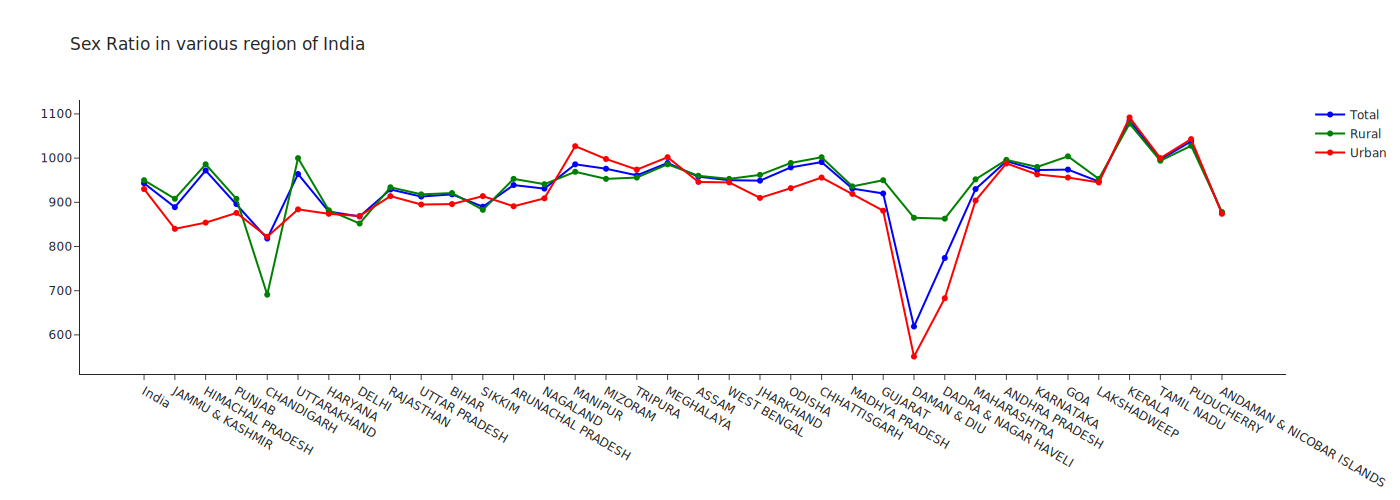

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=df[df['Rural/_Urban']=='Total']['Total_sr'], x=df[df['Rural/_Urban']=='Total']['Location'],
                    mode='lines+markers',
                    name='Total',marker_color='blue'))
fig.add_trace(go.Scatter(y=df[df['Rural/_Urban']=='Rural']['Total_sr'], x=df[df['Rural/_Urban']=='Rural']['Location'],
                    mode='lines+markers',
                    name='Rural',marker_color='green'))
fig.add_trace(go.Scatter(y=df[df['Rural/_Urban']=='Urban']['Total_sr'], x=df[df['Rural/_Urban']=='Urban']['Location'],
                    mode='lines+markers',
                    name='Urban',marker_color='red'))
fig.update_layout(title_text="Sex Ratio in various region of India",template='simple_white')
fig.show()
fig.show("svg",height=500,width=1400) #for static image

In [ ]:
tup = ('Hindu_sr','Muslim_sr','Christian_sr','Sikh_sr','Buddhist_sr',
      'Jain_sr','Other religions and persuasions (incl.Unclassified Sect.)_sr',
                            'Religion not stated_sr')

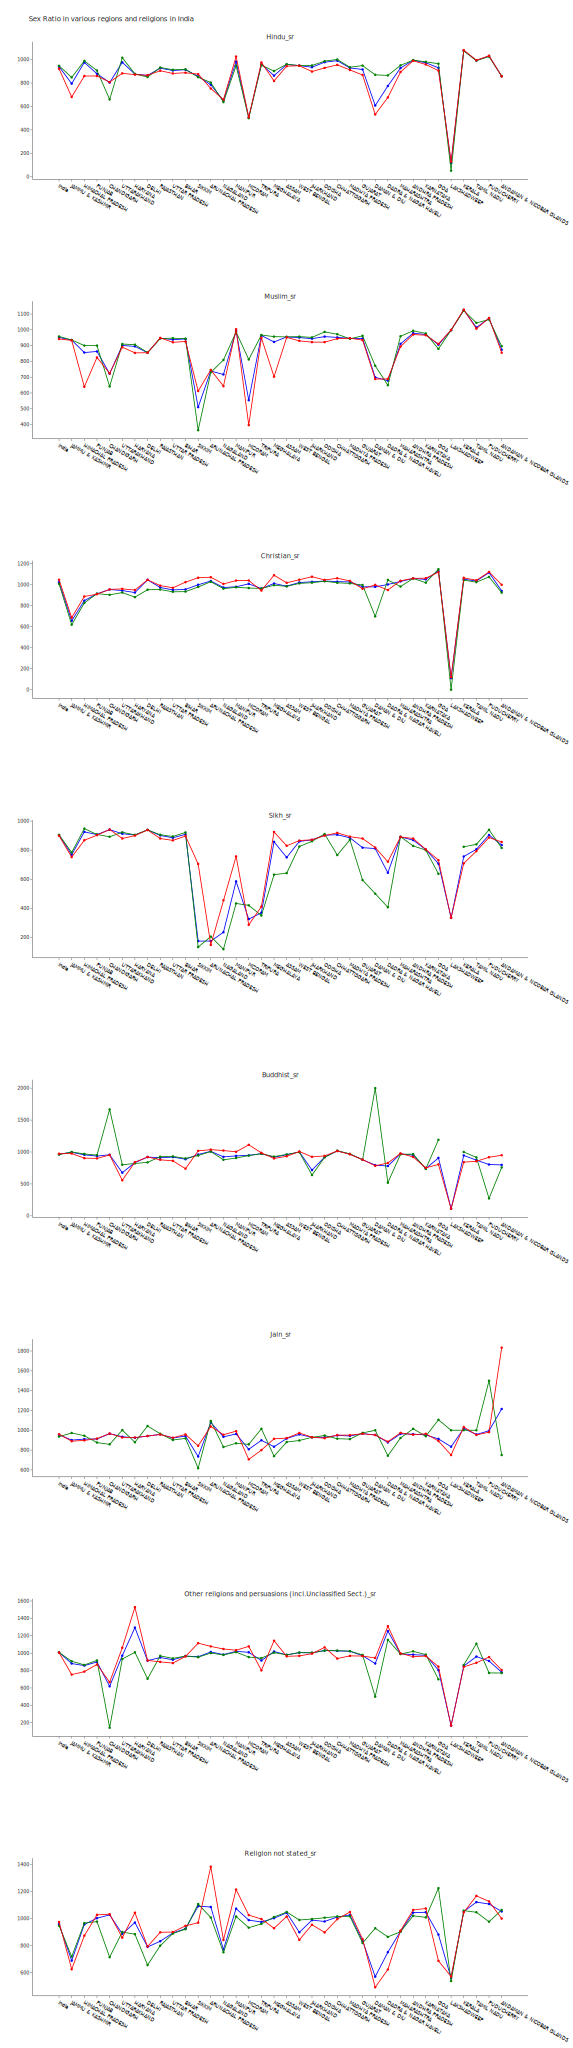

In [ ]:
fig = make_subplots(rows=len(tup), cols=1,#shared_xaxes=True,
                    subplot_titles=tup)
for i in range(len(tup)):
  fig.add_trace(go.Scatter(x=df[df['Rural/_Urban']=='Total']['Location'], y=df[df['Rural/_Urban']=='Total'][tup[i]],mode='lines+markers',
                          name='Total',marker_color='blue'), row=i+1, col=1)
  fig.add_trace(go.Scatter(x=df[df['Rural/_Urban']=='Rural']['Location'], y=df[df['Rural/_Urban']=='Rural'][tup[i]],mode='lines+markers',
                          name='Rural',marker_color='green'), row=i+1, col=1)
  fig.add_trace(go.Scatter(x=df[df['Rural/_Urban']=='Urban']['Location'], y=df[df['Rural/_Urban']=='Urban'][tup[i]],mode='lines+markers',
                          name='Urban',marker_color='red'), row=1+i, col=1)
fig.update_layout(template='simple_white',height = 3000,
                   title='Sex Ratio in various regions and religions in India',
                  showlegend=False)
fig.show()
fig.show("svg",height = 5000,width=1400) #for static image

In [ ]:
temp_total = df[df['Rural/_Urban']=='Total']
temp_total = temp_total[temp_total['Location']!='India']
temp_urban = df[df['Rural/_Urban']=='Urban']
temp_urban = temp_urban[temp_urban['Location']!='India']
temp_rural = df[df['Rural/_Urban']=='Rural']
temp_rural = temp_rural[temp_rural['Location']!='India']

         Total population(males & females) and Sex Ratio in different regions of India


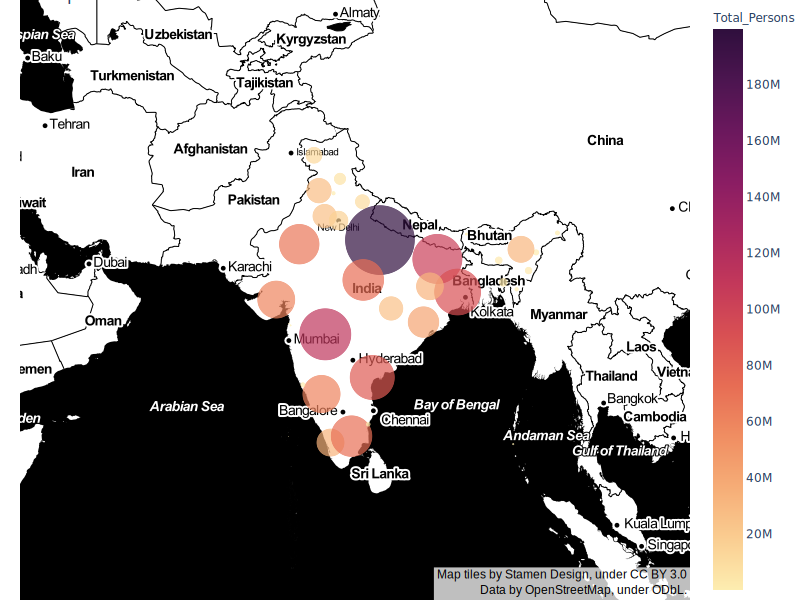

In [ ]:
fig = px.scatter_mapbox(
        temp_total,
        title='map',
        lat="Latitude",
        lon="Longitude",
        color="Total_Persons",
        size="Total_Persons",
        size_max=50,
        hover_name="Location",
        hover_data=["Total_Persons",'Total_Males','Total_Females',"Total_sr"],
        color_continuous_scale='matter',
    )

fig.layout.update(
        margin={"r": 0, "t": 0, "l": 20, "b": 0},
        height=600,
        width = 800,
        coloraxis_showscale=False,
        mapbox_style='stamen-toner',
        mapbox=dict(center=dict(lat=22.3511, lon=78.6677), zoom=3),
    )

fig.data[0].update(
        hovertemplate="Total Persons: %{customdata[0]} <br>Total Males: %{customdata[1]}\
        <br>Total Females: %{customdata[2]} <br>Sex Ratio: %{customdata[3]}"
    )
fig.update_layout(coloraxis_showscale=True)
print('         Total population(males & females) and Sex Ratio in different regions of India')
fig.show()
fig.show('svg',height=600,width = 800,) #for static image
